# Linear model analysis with censored data

In [10]:
# import relevant module
import openturns as ot
import otpod
# enable display figure in notebook
%matplotlib inline

### Generate data

In [11]:
N = 100
ot.RandomGenerator.SetSeed(123456)
defectDist = ot.Uniform(0.1, 0.6)
# normal epsilon distribution
epsilon = ot.Normal(0, 1.9)
defects = defectDist.getSample(N)
signalsInvBoxCox = defects * 43. + epsilon.getSample(N) + 2.5
# Inverse Box Cox transformation
invBoxCox = ot.InverseBoxCoxTransform(0.3)
signals = invBoxCox(signalsInvBoxCox)

### Run analysis with Box Cox

In [22]:
noiseThres = 60.
saturationThres = 1700.
analysis = otpod.UnivariateLinearModelAnalysis(defects, signals, noiseThres,
                                               saturationThres, boxCox=True)

### Get some particular results

In [25]:
print analysis.getIntercept()
print analysis.getR2()
print analysis.getKolmogorovPValue()

[Intercept for uncensored case : 4.777, Intercept for censored case : 4.1614]
[R2 for uncensored case : 0.869115, R2 for censored case : 0.860722]
[Kolmogorov p-value for uncensored case : 0.477505, Kolmogorov p-value for censored case : 0.505919]


### Save all results in a csv file

In [26]:
analysis.saveResults('results.csv')

### Print all results of the linear regression and all tests on the residuals

In [27]:
# Results are displayed for both case
analysis.printResults()

--------------------------------------------------------------------------------
         Linear model analysis results
--------------------------------------------------------------------------------
Box Cox parameter :                                    0.18              
                                                                         
                                                 Uncensored      Censored
                                                                         
Intercept coefficient :                                4.78          4.16
Slope coefficient :                                   18.15         19.94
Standard error of the estimate :                       0.97          1.03
                                                                         
Confidence interval on coefficients                                      
Intercept coefficient :                        [4.19, 5.36]              
Slope coefficient :                           [16.63, 19.67

### Print graphs
#### The linear regression model with data for the uncensored case (default case)

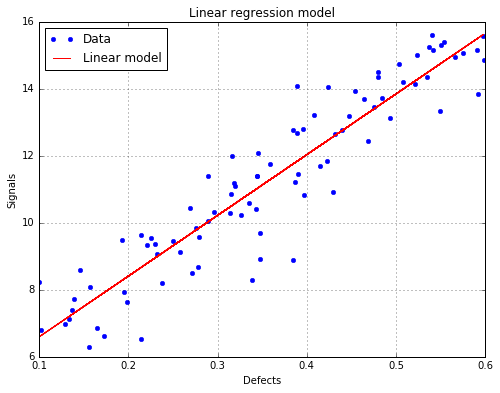

In [15]:
# draw the figure for the uncensored case and save it as png file
fig, ax = analysis.drawLinearModel(name='figure/linearModelUncensored.png')
fig.show()

#### The linear regression model with data for the uncensored case (default case)

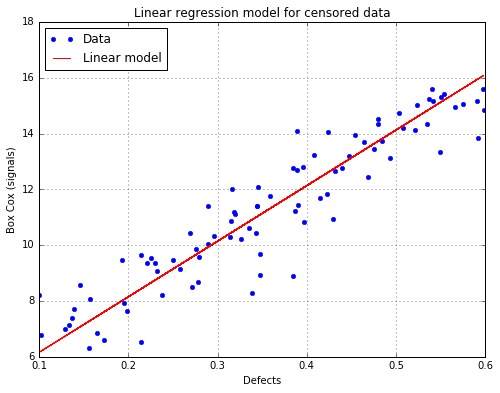

In [16]:
# draw the figure for the censored case and save it as png file
fig, ax = analysis.drawLinearModel(model='censored', name='figure/linearModelCensored.png')
fig.show()